<a href="https://colab.research.google.com/github/tomishing/python_data_science_basics/blob/main/data_manipulation_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data manipulation

### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

### Read a file

In [3]:
df = pd.read_csv('Admission_Predict.csv')
df.head()
df.shape # col row numbers
df.info() #colnames and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


### Basic statistics

In [4]:
df.mean()
df.mode()
df.median()
df.std()
df.var()
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Quantiles

In [5]:
df['GRE Score'].quantile(q=0.25)

np.float64(308.0)

### Plots

#### Histogram

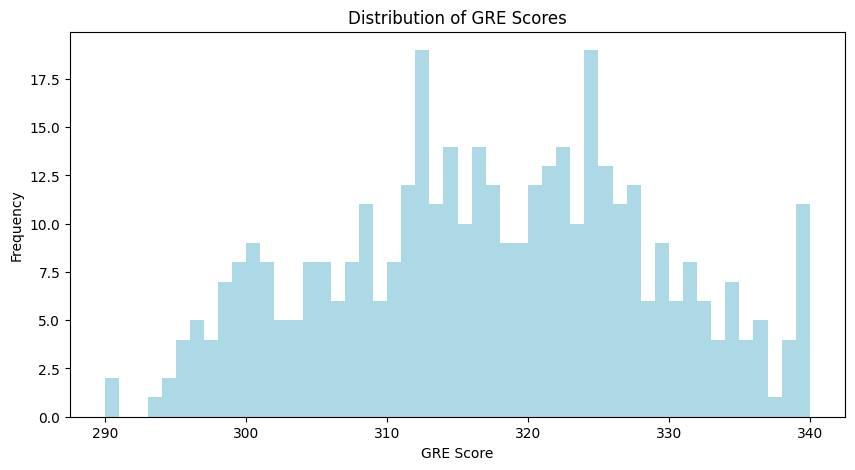

In [6]:
plt.figure(figsize=(10,5))
plt.hist(df['GRE Score'], color='lightblue', bins=50)
plt.xlabel('GRE Score')
plt.ylabel('Frequency')
plt.title('Distribution of GRE Scores')
plt.show()

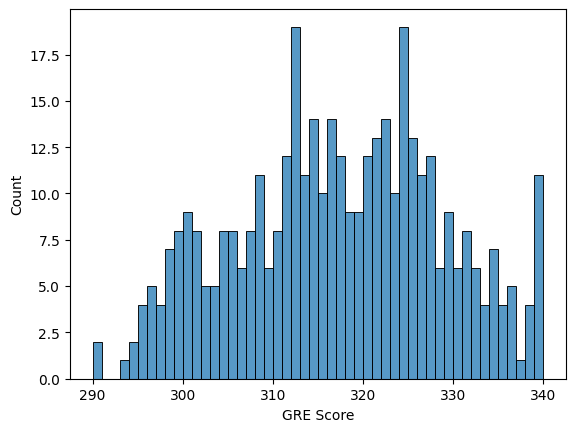

In [9]:
# Using seaborn
sns.histplot(data = df, x = 'GRE Score', bins=50)
plt.show()

#### Boxplot

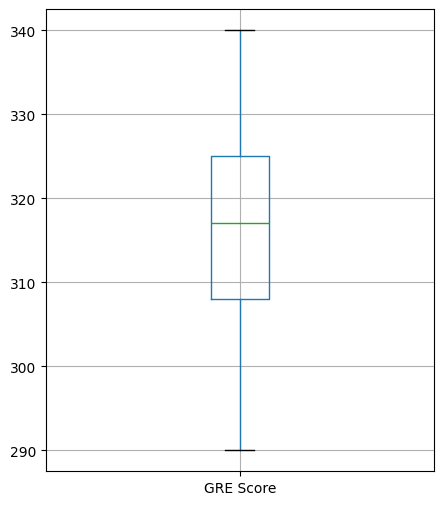

In [10]:
df.boxplot(column='GRE Score', figsize=(5,6))
plt.show()

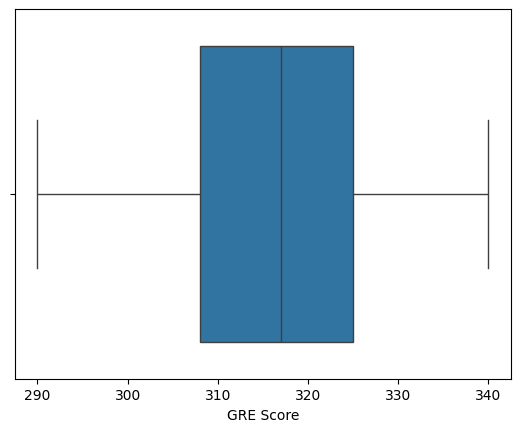

In [11]:
# using seaborn
sns.boxplot(x=df['GRE Score'])
plt.show()

#### Pairplot

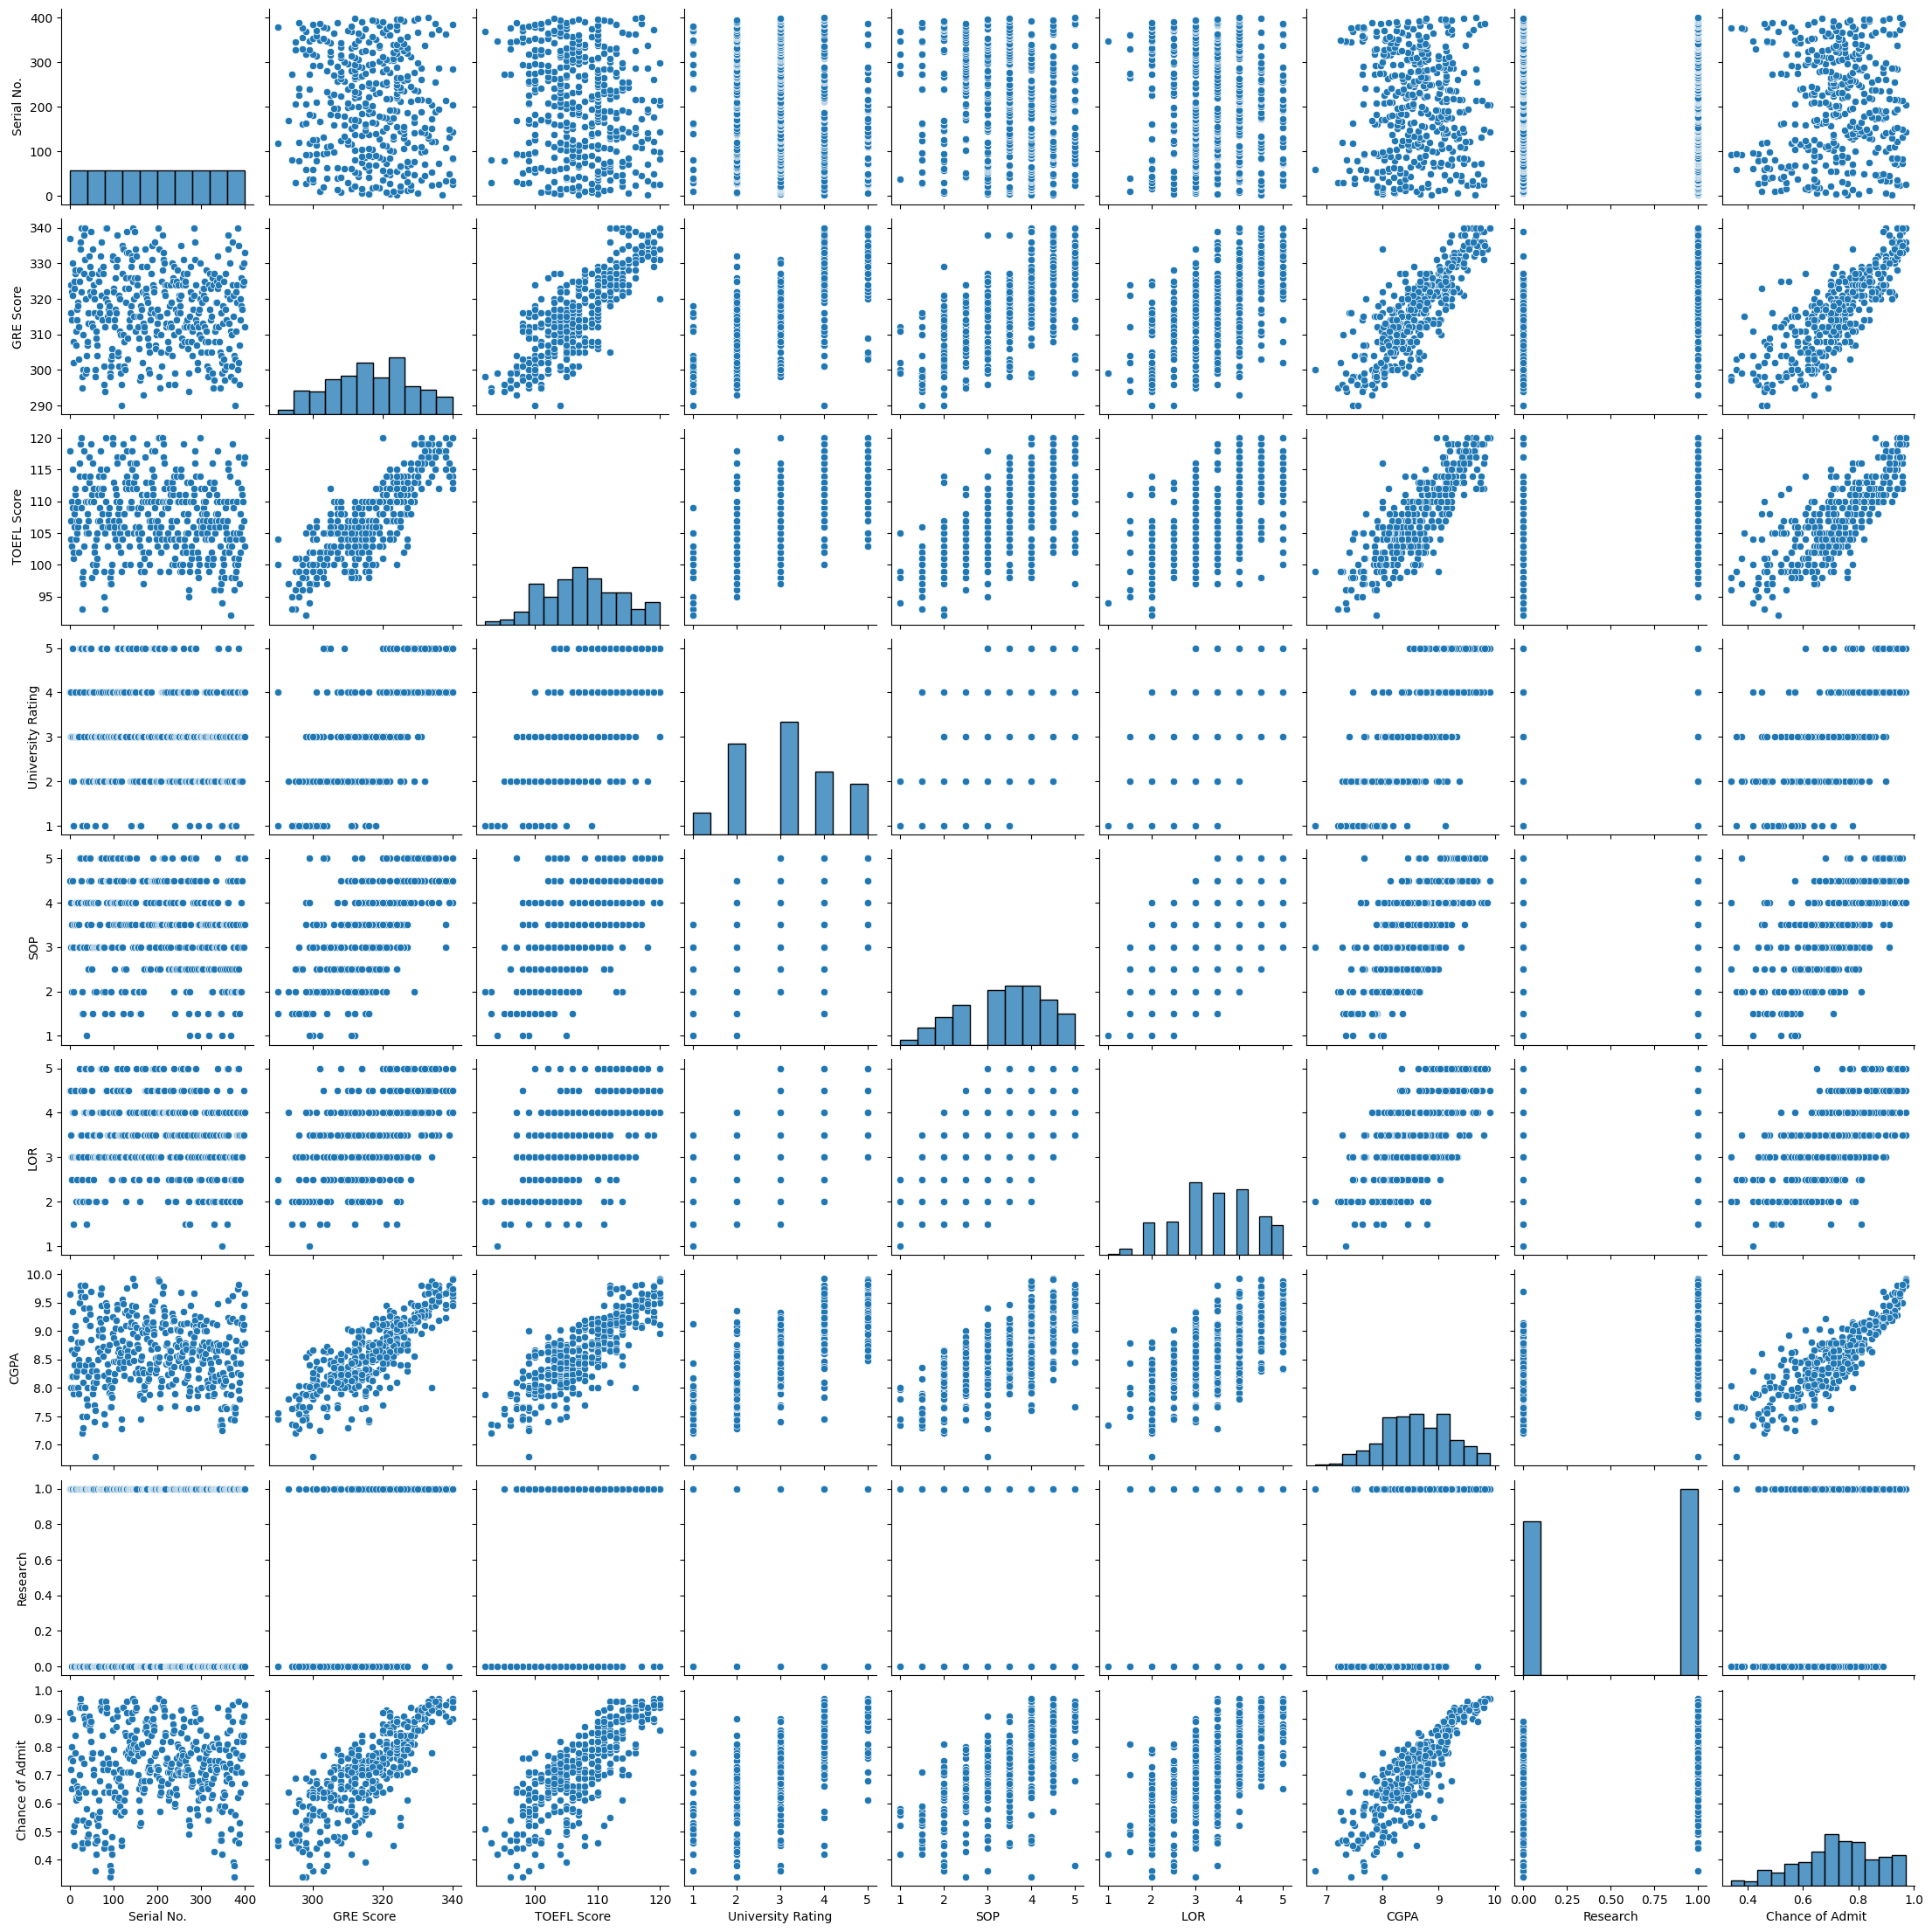

In [12]:
sns.pairplot(df)
plt.show()

#### Heatmap

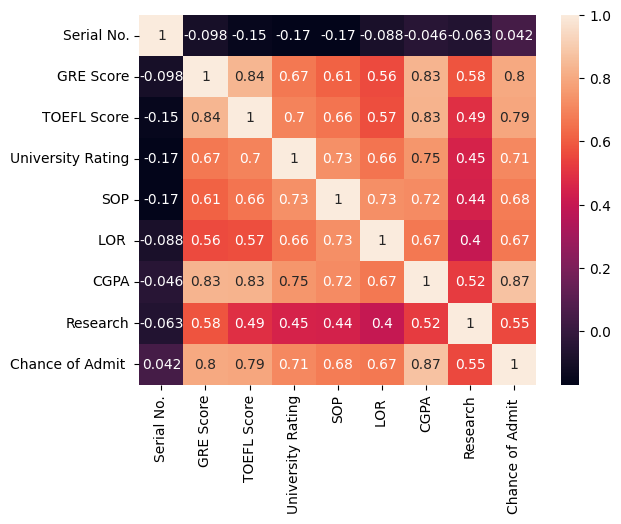

In [13]:
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Distribution

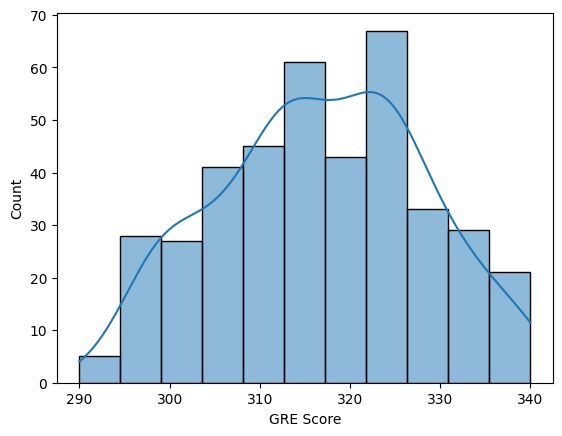

In [14]:
# using seaborn
sns.histplot(df['GRE Score'], kde=True)
plt.show()

##### Skewness and Kurtosis
Negative skew would be indicated by a graph with a long left tail and a large area below the curve toward the right hand side of the distribution. Positive skew would be indicated by a graph with a long right tail and a large area below the curve toward the left hand side of the distribution.

In [15]:
df.skew()

,0
Serial No.,0.000000
GRE Score,-0.062893
TOEFL Score,0.057216
University Rating,0.171260
SOP,-0.275761
LOR,-0.106991
CGPA,-0.065991
Research,-0.191582
Chance of Admit,-0.353448


### Correlation

In [16]:
cor_matrix = df.corr()
print(cor_matrix)

                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Rating   -0.169948   0.668976     0.695590           1.000000   
SOP                 -0.166932   0.612831     0.657981           0.734523   
LOR                 -0.088221   0.557555     0.567721           0.660123   
CGPA                -0.045608   0.833060     0.828417           0.746479   
Research            -0.063138   0.580391     0.489858           0.447783   
Chance of Admit      0.042336   0.802610     0.791594           0.711250   

                        SOP      LOR       CGPA  Research  Chance of Admit   
Serial No.        -0.166932 -0.088221 -0.045608 -0.063138          0.042336  
GRE Score          0.612831  0.557555  0.833060  0.580391          0.802610  
TOEFL

### Missing values, duplicates, outliers

In [17]:
df1 = pd.read_csv('cities_data.csv')
df1.head()

,Number,City,Colors Reported,Shape Reported,State,Time
0,123456.0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,54321.0,Willingboro,green,NaN,NJ,6/30/1930 20:00
2,87654.0,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
4,7654.0,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


#### Duplicates

In [18]:
dup = df1.duplicated()
sum(dup)

13

#### Missing values: `isnull()` function

In [19]:
print(pd.DataFrame({'value' : df1['Number'], 'Missing?' : df1['Number'].isnull()}))

       value  Missing?
0   123456.0     False
1    54321.0     False
2    87654.0     False
3     3456.0     False
4     7654.0     False
5        NaN      True
6    87654.0     False
7     6789.0     False
8        NaN      True
9     4567.0     False
10    7654.0     False
11       NaN      True
12    6543.0     False
13     876.0     False
14    5432.0     False
15       NaN      True
16    4567.0     False
17    7654.0     False
18       NaN      True
19    6543.0     False
20     876.0     False
21    5432.0     False
22    7654.0     False
23    7654.0     False
24    7654.0     False
25    7654.0     False
26    7654.0     False
27    7654.0     False
28    7654.0     False
29    7654.0     False
30    7654.0     False


In [20]:
df1.isnull().values.any()
df1.isnull().sum()

,0
Number,5
City,0
Colors Reported,20
Shape Reported,2
State,2
Time,0


#### Outliers

In [21]:
df2 = pd.read_csv('boston.csv')
df2.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


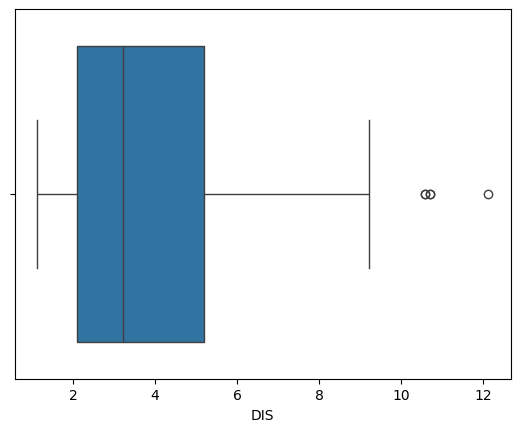

In [22]:
sns.boxplot(x=df2['DIS'])
plt.show()

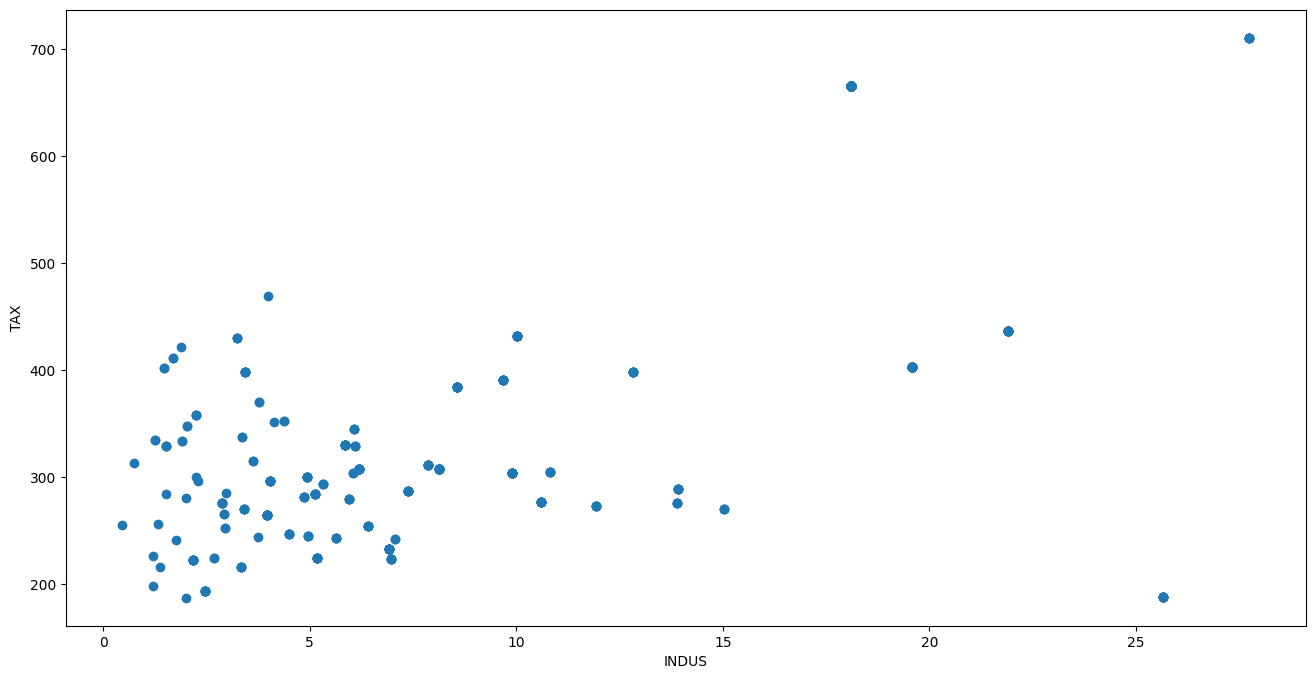

In [23]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(x=df2['INDUS'], y=df2['TAX'])
ax.set_xlabel('INDUS')
ax.set_ylabel('TAX')
plt.show()

##  `plt.subplots(...)`
- This function creates a new figure and a set of subplots (axes).
- It returns two objects:
  - fig: the Figure object — the entire drawing area.
  - ax: the Axes object — the individual plot or graph (a subplot within the figure).

### Why use `'fig, ax = plt.subplots()' instead of 'plt.scatter()'?

- You want more control and better structure in your code.

- You might be creating multiple plots in the same figure.

- It's the recommended way for complex visualizations or reusable plotting functions.





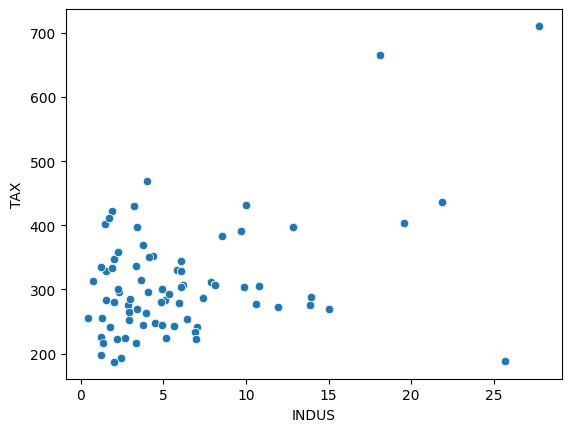

In [24]:
# using seaborn
sns.scatterplot(data=df2, x='INDUS', y='TAX')
plt.show()

## How to remove outlier
### Z-Score

In [25]:
import numpy as np

In [26]:
z = np.abs(stats.zscore(df2))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 0.44105193 1.0755623  0.15968566]
 [0.41733926 0.48772236 0.59338101 ... 0.44105193 0.49243937 0.10152429]
 [0.41734159 0.48772236 0.59338101 ... 0.39642699 1.2087274  1.32424667]
 ...
 [0.41344658 0.48772236 0.11573841 ... 0.44105193 0.98304761 0.14880191]
 [0.40776407 0.48772236 0.11573841 ... 0.4032249  0.86530163 0.0579893 ]
 [0.41500016 0.48772236 0.11573841 ... 0.44105193 0.66905833 1.15724782]]


In [28]:
threshhold = 3
np.where(z > threshhold)

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
        200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
        220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
        277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
        357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
        380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
        416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
        437, 438, 445, 450, 454, 455, 456, 457, 466]),
 array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
         5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
         3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
         0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
        11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

# `np.where()`
- find the indices where a condition is true.
- `z`: a NumPy array (could be 1D, 2D, etc.)
- `threshold`: a scalar value (e.g., 0.5, 100, etc.)
- `z > threshold`: creates a Boolean array — True where the condition is met
- `np.where(...)`: returns the indices of the elements where the condition is True

#### Remove outliers

In [30]:
df2.index # range index

RangeIndex(start=0, stop=506, step=1)

In [34]:
df2

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [31]:
out_index = np.where(z > threshhold)
df3 = df2.drop(df2.index[out_index[0]])
df3.shape

(415, 14)

1. `out_index[0]`

This extracts the actual index array: array([1, 3])

So `out_index[0]` refers to the list of row indices to be removed.

2. `df2.index[out_index[0]]`

This selects rows in the DataFrame df2 at those indices.

3. `df2.drop(...)`

This drops those rows from df2, returning a new DataFrame df3.

4. `df3.shape`

This returns the shape of the new DataFrame: (rows, columns)

It tells you how many rows and columns remain after the drop.



#### Extract

In [32]:
df2_extracted = df2[(z < 3).all(axis=1)]
df2_extracted.shape

(415, 14)

Extract all rows from df2 where every value in the corresponding row of z is less than 3.

`.all(axis=1)` This checks row-wise (because axis=1) whether all values in each row of the Boolean DataFrame are True. It returns a Boolean Series where each value corresponds to a row in z (and df2) and is True if all values in that row are < 3.

In [33]:
df2.shape

(506, 14)

#### Replace with median

In [36]:
df2_copy = df2.copy()


- != `df2_copy = df2`: This does not create a new copy. It just creates a new reference (alias) to the same DataFrame. Any changes to df2_copy will affect df2, and vice versa.

In [38]:
for i, j in zip(out_index[0], out_index[1]):
    df2_copy.iloc[i,j] = df2_copy.iloc[:,j].median()

For every cell in df2_copy where the corresponding value in z is greater than threshold, replace that cell with the median of its column.
z > threshold
Creates a Boolean array where values are True if the value in z exceeds threshold.

1. `np.where(z > threshold)`
  - Returns a tuple of arrays containing the row and column indices of all True values — i.e., all positions where z[i, j] > threshold.
  - np.where(...)[0] → array of row indices i
  - np.where(...)[1] → array of column indices j

2. `zip(...)`
  - Pairs the row and column indices together, so you can loop over each coordinate (i, j) where z[i, j] > threshold.

3. `df2_copy.iloc[i, j] = df2_copy.iloc[:, j].median()`
  - Replaces the value at row i, column j in df2_copy with the median of column j (i.e., the median of all values in that column).

`iloc[]` and `loc[]`
- `.iloc[]` — Integer-location based indexing
Uses integer positions (like indexes in a list).
  - Only accepts integers, slices, or lists of integers.
  - `df.iloc[0, 1]` → returns the value at row 0, column 1 (based on position, not label).
- `.loc[]` — Label-based indexingUses row and column labels.
  - Accepts strings, booleans, slices, or lists of labels.
  - `df.loc[0, 'Age']` → returns the value at row labeled 0, column labeled 'Age'.

In [39]:
df2_copy.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [40]:
df2_copy.iloc[0,1]

np.float64(18.0)

In [41]:
df2_copy.loc[0,'ZN']

np.float64(18.0)

In [42]:
df2_copy.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### IQR Score

#### Remove

In [43]:
q1 = df2.quantile(0.25)
q3 = df2.quantile(0.75)
iqr = q3 - q1

In [57]:
# find locations of outliers
outliers = np.where((df2 < (q1 - 1.5 * iqr)) | (df2 > (q3 + 1.5 * iqr)))
# remove outliers
df2_clean = df2.drop(df2.index[outliers[0]])
print(df2_clean.head())
print(f"\n {df2_clean.shape}")

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

 (268, 14)


#### Extract

In [56]:
df2_extracted_iqr = df2[~((df2 < (q1 - 1.5 * iqr)) |(df2 > (q3 + 1.5 * iqr))).any(axis=1)]
# rows without outliers
print(df2_extracted_iqr.head())
print(f"\n{df2_extracted_iqr.shape}")

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

(268, 14)


Keep only the rows in df2 that do not contain any outlier values, where outliers are defined using the IQR method.
1. `(df2 < (q1 - 1.5 * iqr)) | (df2 > (q3 + 1.5 * iqr))`
  - Creates a Boolean DataFrame: True where an outlier exists, False otherwise.

2. `.any(axis=1)`
  - Returns True for each row that has any True value (i.e., any outlier in that row).

3. `~(...)`
  - Logical NOT: reverses True ↔ False. So now we get True for rows that do not have any outliers.

4. `df2[...]`
  - Filters the original df2 to keep only the rows where there are no outliers.

**`.all(axis=1)` and `.any(axis=1)`**

|Expression|	Meaning|	Returns True when...|
|--|--|--|
|.any(axis=1)	|Row has any True value|	At least one column is True|
|.all(axis=1)|	Row has all True values|	Every column in the row is True|


#### Replace with median

In [60]:
df2_copy_iqr = df2.copy()
outliqr = np.where((df2_copy_iqr < (q1 - 1.5 * iqr)) | (df2_copy_iqr > (q3 + 1.5 * iqr)))

for i, j in zip(outliqr[0], outliqr[1]):
    df2_copy_iqr.iloc[i, j] = df2_copy_iqr.iloc[:, j].median()

**Why it does not need if**
- `np.where(...)` gives you the (i, j) positions only where the outlier condition is met.
- The loop never touches any `False` values, so you never risk replacing non-outliers.
- Think of `np.where(...)` like a filter that gives you:
  > “Only give me the coordinates of the outliers.”
  Then your loop just says:
  > “For each of these coordinates, replace the value with the column median.”
- So there's no need to check again inside the loop — the check already happened.



In [ ]:
df2.shape, df2_copy_iqr.shape, df2_copy.shape

((506, 14), (506, 14), (506, 14))